In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
#Muestra1
df = pd.read_csv('data2.xy', delim_whitespace=True, header=None)
picos = pd.read_csv('picos1.csv')
picos_real = pd.read_csv('1100138.csv', delim_whitespace=True)
#Muestra2
df2 = pd.read_csv('datasal.xy', delim_whitespace=True, header=None)
picos2 = pd.read_csv('picos2.csv', delim_whitespace=True)
picos2_real = pd.read_csv('1000041.txt', delim_whitespace=True)
# Opcional: Asignar nombres a las columnas
df.columns = ['X', 'Y']
df2.columns = ['X', 'Y']

picos.columns = ['2Theta', 'Intensity']
picos2.columns = ['2Theta', 'Intensity']
# Guardar los datos en un archivo CSV
df.to_csv('data2.csv', index=False)
#Normalizacion muestar 1 y 2
df['Y'] = df['Y']/df['Y'].max()*100
picos['Intensity'] = picos['Intensity']/picos['Intensity'].max()*100

df2['Y'] = df2['Y']/df2['Y'].max()*100
picos2['Intensity'] = picos2['Intensity']/picos2['Intensity'].max()*100

In [42]:
# Convertir las columnas X y Y en listas
x_values = picos['2Theta'].tolist()
y_values = picos['Intensity'].tolist()

# Unir las listas en una lista de tuplas
data_points = list(zip(x_values, y_values))

# Convertir las columnas X y Y en listas
x_values2 = picos2['2Theta'].tolist()
y_values2 = picos2['Intensity'].tolist()

# Unir las listas en una lista de tuplas
data_points2 = list(zip(x_values2, y_values2))

############Creamos data points para los lattices reales muestra 2
# Convertir las columnas X y Y en listas
x_valuesr = picos2_real['2theta'].tolist()
y_valuesr = picos2_real['I'].tolist()

# Unir las listas en una lista de tuplas
data_pointsr = list(zip(x_valuesr, y_valuesr))

In [43]:
print(data_pointsr)

[(27.46637, 8.65742), (31.81997, 100.0), (45.61968, 66.24467), (54.07685, 2.30311), (56.69287, 21.48699), (66.49459, 9.48505), (73.37435, 1.16831), (75.60859, 25.4491), (84.36139, 19.00569)]


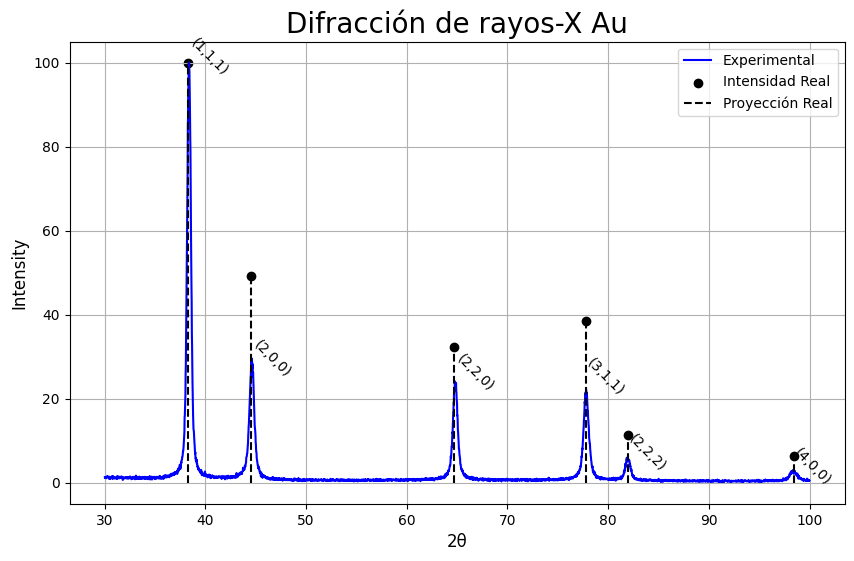

In [44]:
# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(df['X'], df['Y'], linestyle='-', color='b', label = 'Experimental')

# Plot the points
plt.scatter(picos_real['2theta'], picos_real['I'], color='black', label = 'Intensidad Real')

# Draw vertical lines from each point to the 2theta-a2thetais
for i in range(len(picos_real)):
    if i == 1:
        plt.plot([picos_real['2theta'][i], picos_real['2theta'][i]], [0, picos_real['I'][i]], color='black', linestyle='--', label = 'Proyección Real')
    else:
        plt.plot([picos_real['2theta'][i], picos_real['2theta'][i]], [0, picos_real['I'][i]], color='black', linestyle='--')

plt.title('Difracción de rayos-X Au', fontsize=20)
plt.xlabel('2θ', fontsize=12)
plt.ylabel('Intensity', fontsize=12)
plt.grid(True)
plt.legend()
# Posiciones de los picos (X, Y) - Necesitas ajustar estos valores a tus datos reales  # Ejemplo de picos
lattice = ['(1,1,1)', '(2,0,0)', '(2,2,0)', '(3,1,1)', '(2,2,2)', '(4,0,0)']
aux = 0
# Anotar los picos
for x, y in data_points:
    plt.annotate(f'{lattice[aux]}', xy=(x, y), xytext=(x + 2, y-3),
                 horizontalalignment='center', rotation=-45)
    aux += 1
# Mostrar la gráfica
plt.show()

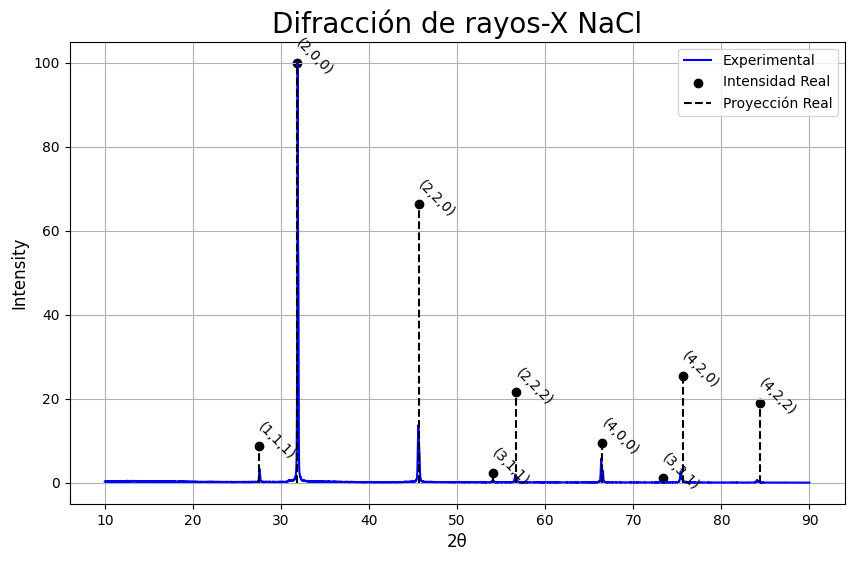

In [45]:
# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(df2['X'], df2['Y'], linestyle='-', color='b', label = 'Experimental')

# Plot the points
plt.scatter(picos2_real['2theta'], picos2_real['I'], color='black', label = 'Intensidad Real')

# Draw vertical lines from each point to the 2theta-a2thetais
for i in range(len(picos2_real)):
    if i == 1:
        plt.plot([picos2_real['2theta'][i], picos2_real['2theta'][i]], [0, picos2_real['I'][i]], color='black', linestyle='--', label = 'Proyección Real')
    else:
        plt.plot([picos2_real['2theta'][i], picos2_real['2theta'][i]], [0, picos2_real['I'][i]], color='black', linestyle='--')

plt.title('Difracción de rayos-X NaCl', fontsize=20)
plt.xlabel('2θ', fontsize=12)
plt.ylabel('Intensity', fontsize=12)
plt.grid(True)
plt.legend()
# Posiciones de los picos (X, Y) - Necesitas ajustar estos valores a tus datos reales  # Ejemplo de picos
lattice2 = ['(1,1,1)', '(2,0,0)', '(2,2,0)', '(3,1,1)', '(2,2,2)', '(4,0,0)', '(3,3,1)', '(4,2,0)']
latticereal = ['(1,1,1)', '(2,0,0)', '(2,2,0)', '(3,1,1)', '(2,2,2)', '(4,0,0)', '(3,3,1)', '(4,2,0)', '(4,2,2)']
aux2 = 0
auxr = 0
# Anotar los picos
for x, y in data_pointsr:
    if aux2 == 3 | aux2 == 6:
        plt.annotate(f'{latticereal[aux2]}', xy=(x, y), xytext=(x -1, y+5),
                 horizontalalignment='center')
    if aux2 == 9:
        plt.annotate(f'{latticereal[aux2]}', xy=(x, y), xytext=(x +2, y+8),
                 horizontalalignment='center')
    else:
        plt.annotate(f'{latticereal[aux2]}', xy=(x, y), xytext=(x + 2, y-3),
                 horizontalalignment='center', rotation=-45)
    aux2 += 1

# Mostrar la gráfica
plt.show()